# Packages and Dataset

In [21]:
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

import io

In [22]:
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [111]:
#data file read
data = pd.read_csv('/drive/My Drive/MLAssignment4/population.csv') 
data

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,...,PARENT,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,YEAR
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199518,87,Not in universe,0,0,7th and 8th grade,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,...,Not in universe,Canada,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95
199519,65,Self-employed-incorporated,37,2,11th grade,0,Not in universe,Married-civilian spouse present,Business and repair services,Executive admin and managerial,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94
199520,47,Not in universe,0,0,Some college but no degree,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,...,Not in universe,Poland,Poland,Germany,Foreign born- U S citizen by naturalization,0,Not in universe,2,52,95
199521,16,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95


In [112]:
columns1=["AAGE", "ACLSWKR", "ADTIND", "ADTOCC",	"AHGA",	"AHRSPAY",	"AHSCOL",	"AMARITL",	"AMJIND",	"AMJOCC"	,"ARACE"	,"AREORGN",	"ASEX",	"AUNMEM"	,"AUNTYPE"	,"AWKSTAT",	"CAPGAIN",	"CAPLOSS",	"DIVVAL",	"FILESTAT"	,"GRINREG"	,"GRINST",	"HHDFMX",	"HHDREL",	"MIGMTR1",	"MIGMTR3",	"MIGMTR4",	"MIGSAME",	"MIGSUN",	"NOEMP"	,"PARENT",	"PEFNTVTY"	,"PEMNTVTY",	"PENATVTY"	,"PRCITSHP",	"SEOTR",	"VETQVA",	"VETYN"	,"WKSWORK",	"YEAR"]

In [113]:
columns2=[ "ACLSWKR",	"AHGA",	"AHSCOL",	"AMARITL",	"AMJIND",	"AMJOCC"	,"ARACE"	,"AREORGN",	"ASEX",	"AUNMEM"	,"AUNTYPE"	,"AWKSTAT",	"FILESTAT"	,"GRINREG"	,"GRINST",	"HHDFMX",	"HHDREL",	"MIGMTR1",	"MIGMTR3",	"MIGMTR4",	"MIGSAME",	"MIGSUN","PARENT",	"PEFNTVTY"	,"PEMNTVTY",	"PENATVTY"	,"PRCITSHP",	"VETQVA"	]

# Preprocessing

In [114]:
#Replace ? with NAN
for q in columns2:
  data[q] = data[q].mask(data[q].str.strip() == "?")
  data[q] = data[q].apply(lambda x: np.nan if x == '?' else x) 
  data[q].apply(lambda x: np.nan if str(x).find('?')>-1 else x)

In [115]:
data

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,...,PARENT,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,YEAR
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199518,87,Not in universe,0,0,7th and 8th grade,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,...,Not in universe,Canada,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95
199519,65,Self-employed-incorporated,37,2,11th grade,0,Not in universe,Married-civilian spouse present,Business and repair services,Executive admin and managerial,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94
199520,47,Not in universe,0,0,Some college but no degree,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,...,Not in universe,Poland,Poland,Germany,Foreign born- U S citizen by naturalization,0,Not in universe,2,52,95
199521,16,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95


In [98]:
#Null Values in Respective column
data.isnull().sum().sort_values(ascending = False).head(10)

AAGE       0
ACLSWKR    0
HHDFMX     0
HHDREL     0
MIGMTR1    0
MIGMTR3    0
MIGMTR4    0
MIGSAME    0
MIGSUN     0
NOEMP      0
dtype: int64

In [116]:
#Checking the missing value and if they have more than 40% will remove them
perc = 40.0 
for c in columns2:
   print(c,data[c].isna().sum()/len(data))
min_count =  int(((100-perc)/100)*data.shape[0] + 1)
data = data.dropna( axis=1, 
                thresh=min_count)

ACLSWKR 0.0
AHGA 0.0
AHSCOL 0.0
AMARITL 0.0
AMJIND 0.0
AMJOCC 0.0
ARACE 0.0
AREORGN 0.0
ASEX 0.0
AUNMEM 0.0
AUNTYPE 0.0
AWKSTAT 0.0
FILESTAT 0.0
GRINREG 0.0
GRINST 0.003548463084456429
HHDFMX 0.0
HHDREL 0.0
MIGMTR1 0.4996717170451527
MIGMTR3 0.4996717170451527
MIGMTR4 0.4996717170451527
MIGSAME 0.0
MIGSUN 0.4996717170451527
PARENT 0.0
PEFNTVTY 0.03364524390671752
PEMNTVTY 0.030668143522300687
PENATVTY 0.017005558256441615
PRCITSHP 0.0
VETQVA 0.0


# Imputation, Bucketization, One Hot Encoding

In [118]:
#Droping columns based on ratio with more than 85% 
az=[]
for col in data: 
  print(data[col].value_counts(ascending = True, normalize = True).max(), col)
for col in data:
  ratio = data[col].value_counts(ascending = True, normalize = True).max()
  if(ratio > 0.85): 
    az.append(col)

data=data.drop(az, axis = 1) 

0.01748670579331706 AAGE
0.5024232795216591 ACLSWKR
0.5046235271121625 ADTIND
0.5046235271121625 ADTOCC
0.2426136335159355 AHGA
0.943344877532916 AHRSPAY
0.9369496248552799 AHSCOL
0.4334587992361783 AMARITL
0.5046235271121625 AMJIND
0.5046235271121625 AMJOCC
0.8388255990537432 ARACE
0.8615898918921628 AREORGN
0.5211629736922561 ASEX
0.9044521183021507 AUNMEM
0.9695774421996461 AUNTYPE
0.6203244738701804 AWKSTAT
0.9630167950562091 CAPGAIN
0.9804233095933802 CAPLOSS
0.8940422908637099 DIVVAL
0.3763676368138009 FILESTAT
0.920946457300662 GRINREG
0.9242260392827503 GRINST
0.2668765004535818 HHDFMX
0.37827719110077535 HHDREL
0.5072698385649774 MIGSAME
0.48106233366579293 NOEMP
0.7228840785272875 PARENT
0.8254914164203101 PEFNTVTY
0.8297605013339951 PEMNTVTY
0.9024065670728598 PENATVTY
0.8870756754860342 PRCITSHP
0.9055196643995931 SEOTR
0.9900562842379074 VETQVA
0.7524445803240729 VETYN
0.48106233366579293 WKSWORK
0.5003282829548473 YEAR


In [119]:
data.columns

Index(['AAGE', 'ACLSWKR', 'ADTIND', 'ADTOCC', 'AHGA', 'AMARITL', 'AMJIND',
       'AMJOCC', 'ARACE', 'ASEX', 'AWKSTAT', 'FILESTAT', 'HHDFMX', 'HHDREL',
       'MIGSAME', 'NOEMP', 'PARENT', 'PEFNTVTY', 'PEMNTVTY', 'VETYN',
       'WKSWORK', 'YEAR'],
      dtype='object')

Imputation

In [126]:
mode_append=[]
for column in data.columns:
    mode_append.append(data[column].mode()[0])
    data[column].fillna(data[column].mode()[0], inplace=True)
print(mode_append)

[0.0, ' Not in universe', 0, 0, ' High school graduate', ' Never married', ' Not in universe or children', ' Not in universe', ' White', ' Female', ' Children or Armed Forces', ' Nonfiler', ' Householder', ' Householder', ' Not in universe under 1 year old', 0, ' Not in universe', ' United-States', ' United-States', 2, 0.0, 94]


Bucketization

In [127]:
# Numercial Columns 
numercial_columns=["AAGE","WKSWORK"]

In [128]:
#Bucketizing
from sklearn.preprocessing import KBinsDiscretizer
def bucketize(data, c, b):
  Bucketizer=KBinsDiscretizer(n_bins=b, encode='ordinal', strategy='quantile')
  n1data=pd.cut(data[c], bins = b, labels = False).to_numpy()
  d1=Bucketizer.fit_transform(n1data.reshape(-1, 1))
  data[c] = d1

In [129]:
for c in numercial_columns:
  if(c=="AAGE"):
    bucketize(data,c,10)
  else:
    bucketize(data,c,5)

In [130]:
data

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AMARITL,AMJIND,AMJOCC,ARACE,ASEX,...,HHDFMX,HHDREL,MIGSAME,NOEMP,PARENT,PEFNTVTY,PEMNTVTY,VETYN,WKSWORK,YEAR
0,6.0,Not in universe,0,0,High school graduate,Widowed,Not in universe or children,Not in universe,White,Female,...,Other Rel 18+ ever marr not in subfamily,Other relative of householder,Not in universe under 1 year old,0,Not in universe,United-States,United-States,2,0.0,95
1,6.0,Self-employed-not incorporated,4,34,Some college but no degree,Divorced,Construction,Precision production craft & repair,White,Male,...,Householder,Householder,No,1,Not in universe,United-States,United-States,2,0.0,94
2,1.0,Not in universe,0,0,10th grade,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,Female,...,Child 18+ never marr Not in a subfamily,Child 18 or older,Not in universe under 1 year old,0,Not in universe,Vietnam,Vietnam,2,0.0,95
3,0.0,Not in universe,0,0,Children,Never married,Not in universe or children,Not in universe,White,Female,...,Child <18 never marr not in subfamily,Child under 18 never married,Yes,0,Both parents present,United-States,United-States,0,0.0,94
4,1.0,Not in universe,0,0,Children,Never married,Not in universe or children,Not in universe,White,Female,...,Child <18 never marr not in subfamily,Child under 18 never married,Yes,0,Both parents present,United-States,United-States,0,0.0,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199518,6.0,Not in universe,0,0,7th and 8th grade,Married-civilian spouse present,Not in universe or children,Not in universe,White,Male,...,Householder,Householder,Not in universe under 1 year old,0,Not in universe,Canada,United-States,2,0.0,95
199519,6.0,Self-employed-incorporated,37,2,11th grade,Married-civilian spouse present,Business and repair services,Executive admin and managerial,White,Male,...,Householder,Householder,Yes,1,Not in universe,United-States,United-States,2,0.0,94
199520,5.0,Not in universe,0,0,Some college but no degree,Married-civilian spouse present,Not in universe or children,Not in universe,White,Male,...,Householder,Householder,Not in universe under 1 year old,6,Not in universe,Poland,Poland,2,0.0,95
199521,1.0,Not in universe,0,0,10th grade,Never married,Not in universe or children,Not in universe,White,Female,...,Child <18 never marr not in subfamily,Child under 18 never married,Not in universe under 1 year old,0,Both parents present,United-States,United-States,2,0.0,95


One-Hot Encoding

In [131]:
dt=data.copy()
for c in data.columns:

  dt= pd.get_dummies(dt, columns=[c], prefix = [c])

print(dt)

        AAGE_0.0  AAGE_1.0  AAGE_2.0  AAGE_3.0  AAGE_4.0  AAGE_5.0  AAGE_6.0  \
0              0         0         0         0         0         0         1   
1              0         0         0         0         0         0         1   
2              0         1         0         0         0         0         0   
3              1         0         0         0         0         0         0   
4              0         1         0         0         0         0         0   
...          ...       ...       ...       ...       ...       ...       ...   
199518         0         0         0         0         0         0         1   
199519         0         0         0         0         0         0         1   
199520         0         0         0         0         0         1         0   
199521         0         1         0         0         0         0         0   
199522         0         0         0         1         0         0         0   

        ACLSWKR_ Federal government  AC

In [139]:
data1= dt.copy()
data2=dt.copy()

In [140]:
data2

,AAGE_0.0,AAGE_1.0,AAGE_2.0,AAGE_3.0,AAGE_4.0,AAGE_5.0,AAGE_6.0,ACLSWKR_ Federal government,ACLSWKR_ Local government,ACLSWKR_ Never worked,...,PEMNTVTY_ Trinadad&Tobago,PEMNTVTY_ United-States,PEMNTVTY_ Vietnam,PEMNTVTY_ Yugoslavia,VETYN_0,VETYN_1,VETYN_2,WKSWORK_0.0,YEAR_94,YEAR_95
0,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,1,0,1
1,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,1,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199518,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,1,0,1
199519,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,1,1,0
199520,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
199521,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,1


In [141]:
dataframe = pd.concat([data, dt], axis=1, join='inner')

In [142]:
dataframe

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AMARITL,AMJIND,AMJOCC,ARACE,ASEX,...,PEMNTVTY_ Trinadad&Tobago,PEMNTVTY_ United-States,PEMNTVTY_ Vietnam,PEMNTVTY_ Yugoslavia,VETYN_0,VETYN_1,VETYN_2,WKSWORK_0.0,YEAR_94,YEAR_95
0,6.0,Not in universe,0,0,High school graduate,Widowed,Not in universe or children,Not in universe,White,Female,...,0,1,0,0,0,0,1,1,0,1
1,6.0,Self-employed-not incorporated,4,34,Some college but no degree,Divorced,Construction,Precision production craft & repair,White,Male,...,0,1,0,0,0,0,1,1,1,0
2,1.0,Not in universe,0,0,10th grade,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,Female,...,0,0,1,0,0,0,1,1,0,1
3,0.0,Not in universe,0,0,Children,Never married,Not in universe or children,Not in universe,White,Female,...,0,1,0,0,1,0,0,1,1,0
4,1.0,Not in universe,0,0,Children,Never married,Not in universe or children,Not in universe,White,Female,...,0,1,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199518,6.0,Not in universe,0,0,7th and 8th grade,Married-civilian spouse present,Not in universe or children,Not in universe,White,Male,...,0,1,0,0,0,0,1,1,0,1
199519,6.0,Self-employed-incorporated,37,2,11th grade,Married-civilian spouse present,Business and repair services,Executive admin and managerial,White,Male,...,0,1,0,0,0,0,1,1,1,0
199520,5.0,Not in universe,0,0,Some college but no degree,Married-civilian spouse present,Not in universe or children,Not in universe,White,Male,...,0,0,0,0,0,0,1,1,0,1
199521,1.0,Not in universe,0,0,10th grade,Never married,Not in universe or children,Not in universe,White,Female,...,0,1,0,0,0,0,1,1,0,1


# PCA

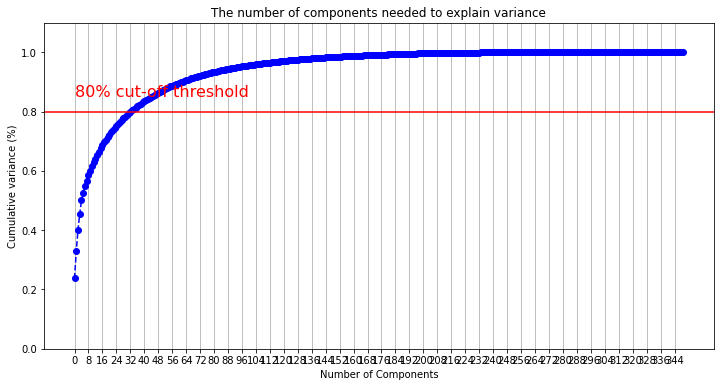

In [149]:
#PCA for dividng the dataset into samples and labels
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA().fit(data2)
plt.rcParams["figure.figsize"] = (12,6)
fig, ax = plt.subplots()
xi = np.arange(0, 350, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 352, step=8)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.80, color='r', linestyle='-')
plt.text(0.5, 0.85, '80% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [150]:
a1=data2.copy()
pca = PCA(n_components = 32)
pca.fit(a1)
PCA_data = pca.transform(a1)

In [151]:
np.shape(PCA_data)
length_PCA_data= len(PCA_data)

# Clustering

In [152]:
from pyclustering.cluster import cluster_visualizer_multidim
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.kmedians import kmedians
def KMEDIAN(reduced,value_k): 
  np.random.shuffle(reduced)
  k_median1=kmedians(reduced,np.copy(np.unique(reduced, axis=0)[:value_k]))
  k_median1.process()
  clus_distance=k_median1.get_total_wce()
  return clus_distance

In [153]:
# cluster distances store the avg within-cluster distance for k=[10,24]
cluster_distances=[]
idx=9
while(idx<24):
  y=PCA_data.copy()
  np.random.shuffle(y)
  k_median1=kmedians(y,np.copy(np.unique(y, axis=0)[:idx+1]))
  k_median1.process()
  clus_distance=k_median1.get_total_wce()
  cluster_distances.append(clus_distance)
  print(idx+1,clus_distance/(idx+1))
  idx=idx+1

10 171911.61050250547
11 145902.64092623795
12 137395.08227156827
13 137588.85758527793
14 103532.46882942908
15 107360.68290355525
16 96323.8789072522
17 93933.96890667874
18 86427.5566445596
19 77061.94845265696
20 80307.31615346056
21 70047.35093479493
22 68022.22120427842
23 64545.59690010693
24 57102.264721945285


In [201]:
clg=[]

for g in range(10,25):
    clg.append(cluster_distances[k-10]/g)

plt.plot([10,11,12,13,14,15,16,17,18,19,20,21,22,23,24],clg,marker='*')
plt.grid()
plt.xlabel("No. of clusters")
plt.ylabel("AVERAGE DISTACNE ")
plt.title("K_MEDIAN CLUSTERING ")
plt.show()

TypeError: ignored

In [159]:
#Converting Medians into np.array()
def get_total():
  cost = 0
  for i in range(len(md)):
    cluster = PCA_data[cluster[i]]
    cost_cluster = np.sum((cluster - md[i])**2, axis = 1, keepdims = True)
    cost += np.sum(cost_cluster)
  return cost/len(md)

In [160]:
# k median clustering on best value of k = 22
y=PCA_data.copy()
np.random.shuffle(y)
k_median1=kmedians(y,np.copy(np.unique(y, axis=0)[:22]))
k_median1.process()
clus_distance=k_median1.get_total_wce()
cluster = k_median1.get_clusters()
md = k_median1.get_medians()
print(22,clus_distance/22)

22 68022.22120427842


# Handling more than 50K Data

Dataset

In [174]:
dataset = pd.read_csv("/drive/MyDrive/MLAssignment4/more_than_50k.csv")

In [170]:
columns1A=["AAGE", "ACLSWKR", "ADTIND", "ADTOCC",	"AHGA",	"AHRSPAY",	"AHSCOL",	"AMARITL",	"AMJIND",	"AMJOCC"	,"ARACE"	,"AREORGN",	"ASEX",	"AUNMEM"	,"AUNTYPE"	,"AWKSTAT",	"CAPGAIN",	"CAPLOSS",	"DIVVAL",	"FILESTAT"	,"GRINREG"	,"GRINST",	"HHDFMX",	"HHDREL",	"MIGMTR1",	"MIGMTR3",	"MIGMTR4",	"MIGSAME",	"MIGSUN",	"NOEMP"	,"PARENT",	"PEFNTVTY"	,"PEMNTVTY",	"PENATVTY"	,"PRCITSHP",	"SEOTR",	"VETQVA",	"VETYN"	,"WKSWORK",	"YEAR"]

In [171]:
columns2A=[ "ACLSWKR",	"AHGA",	"AHSCOL",	"AMARITL",	"AMJIND",	"AMJOCC"	,"ARACE"	,"AREORGN",	"ASEX",	"AUNMEM"	,"AUNTYPE"	,"AWKSTAT",	"FILESTAT"	,"GRINREG"	,"GRINST",	"HHDFMX",	"HHDREL",	"MIGMTR1",	"MIGMTR3",	"MIGMTR4",	"MIGSAME",	"MIGSUN","PARENT",	"PEFNTVTY"	,"PEMNTVTY",	"PENATVTY"	,"PRCITSHP",	"VETQVA"	]

In [176]:
dataset

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,...,PARENT,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,YEAR
0,57,Self-employed-incorporated,11,2,High school graduate,0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Executive admin and managerial,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95
1,44,Private,3,38,High school graduate,0,Not in universe,Married-civilian spouse present,Mining,Transportation and material moving,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,No,1,48,94
2,54,Private,19,26,High school graduate,1550,Not in universe,Married-civilian spouse present,Manufacturing-nondurable goods,Adm support including clerical,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94
3,25,Private,33,2,9th grade,0,Not in universe,Never married,Retail trade,Executive admin and managerial,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,1,Not in universe,2,52,95
4,26,Private,11,5,Bachelors degree(BA AB BS),0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Professional specialty,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3575,57,Private,14,37,High school graduate,0,Not in universe,Divorced,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94
3576,63,Self-employed-not incorporated,37,12,Masters degree(MA MS MEng MEd MSW MBA),0,Not in universe,Separated,Business and repair services,Professional specialty,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,49,94
3577,39,Private,41,6,Masters degree(MA MS MEng MEd MSW MBA),0,Not in universe,Married-civilian spouse present,Hospital services,Professional specialty,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95
3578,53,Self-employed-incorporated,35,2,Bachelors degree(BA AB BS),0,Not in universe,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94


In [175]:
for c in columns2A:
  print(c) 

  print(dataset[c])
  dataset[c] = dataset[c].mask(dataset[c].str.strip() == "?")
  dataset[c] = dataset[c].apply(lambda x: np.nan if x == '?' else x) 
  dataset[c].apply(lambda x: np.nan if str(x).find('?')>-1 else x)

ACLSWKR
0            Self-employed-incorporated
1                               Private
2                               Private
3                               Private
4                               Private
                     ...               
3575                            Private
3576     Self-employed-not incorporated
3577                            Private
3578         Self-employed-incorporated
3579                    Not in universe
Name: ACLSWKR, Length: 3580, dtype: object
AHGA
0                          High school graduate
1                          High school graduate
2                          High school graduate
3                                     9th grade
4                    Bachelors degree(BA AB BS)
                         ...                   
3575                       High school graduate
3576     Masters degree(MA MS MEng MEd MSW MBA)
3577     Masters degree(MA MS MEng MEd MSW MBA)
3578                 Bachelors degree(BA AB BS)
3579     Masters degree(

In [177]:
dataset.isnull().sum().sort_values(ascending = False).head(10)

MIGSUN      1906
MIGMTR1     1906
MIGMTR3     1906
MIGMTR4     1906
PEFNTVTY     162
PEMNTVTY     134
PENATVTY      93
GRINST        14
HHDFMX         0
HHDREL         0
dtype: int64

In [179]:
perc = 40.0
for c in columns2A:
   print(c,dataset[c].isna().sum()/len(dataset))
min_count =  int(((100-perc)/100)*dataset.shape[0] + 1)
dfA = dataset.dropna( axis=1, 
                thresh=min_count)


ACLSWKR 0.0
AHGA 0.0
AHSCOL 0.0
AMARITL 0.0
AMJIND 0.0
AMJOCC 0.0
ARACE 0.0
AREORGN 0.0
ASEX 0.0
AUNMEM 0.0
AUNTYPE 0.0
AWKSTAT 0.0
FILESTAT 0.0
GRINREG 0.0
GRINST 0.003910614525139665
HHDFMX 0.0
HHDREL 0.0
MIGMTR1 0.5324022346368715
MIGMTR3 0.5324022346368715
MIGMTR4 0.5324022346368715
MIGSAME 0.0
MIGSUN 0.5324022346368715
PARENT 0.0
PEFNTVTY 0.045251396648044694
PEMNTVTY 0.037430167597765365
PENATVTY 0.025977653631284917
PRCITSHP 0.0
VETQVA 0.0


In [180]:
az=[]
for col in dataset: 
  print(dataset[col].value_counts(ascending = True, normalize = True).max(), col)
for col in dataset:
  ratio = dataset[col].value_counts(ascending = True, normalize = True).max()
  if(ratio > 0.85): 
    az.append(col)

dataset=dataset.drop(az, axis = 1)

0.043016759776536316 AAGE
0.590782122905028 ACLSWKR
0.08966480446927375 ADTIND
0.22905027932960895 ADTOCC
0.3027932960893855 AHGA
0.9583798882681565 AHRSPAY
0.9977653631284916 AHSCOL
0.7782122905027933 AMARITL
0.11899441340782123 AMJIND
0.28938547486033517 AMJOCC
0.9159217877094972 ARACE
0.9477653631284916 AREORGN
0.7801675977653632 ASEX
0.8231843575418994 AUNMEM
0.9874301675977654 AUNTYPE
0.4701117318435754 AWKSTAT
0.8106145251396648 CAPGAIN
0.9058659217877095 CAPLOSS
0.5650837988826816 DIVVAL
0.714804469273743 FILESTAT
0.9460893854748603 GRINREG
0.9498037016264722 GRINST
0.6329608938547486 HHDFMX
0.7784916201117319 HHDREL
0.8847072879330944 MIGMTR1
0.8847072879330944 MIGMTR3
0.8847072879330944 MIGMTR4
0.5324022346368715 MIGSAME
0.8847072879330944 MIGSUN
0.4472067039106145 NOEMP
1.0 PARENT
0.8645406670567584 PEFNTVTY
0.8731863029599536 PEMNTVTY
0.9248637797533696 PENATVTY
0.9008379888268156 PRCITSHP
0.8458100558659218 SEOTR
0.9824022346368715 VETQVA
0.9824022346368715 VETYN
0.83156424

In [181]:
for c in dataset.columns:
  print(dataset[c].isna().sum())

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [182]:
mode_append1=[]
for column in dataset.columns:
    print(column,dataset[column].mode()[0] )
    mode_append1.append(dataset[column].mode()[0])
    dataset[column].fillna(dataset[column].mode()[0], inplace=True)
print(mode_append1)

AAGE 46
ACLSWKR  Private
ADTIND 45
ADTOCC 2
AHGA  Bachelors degree(BA AB BS)
AMARITL  Married-civilian spouse present
AMJIND  Manufacturing-durable goods
AMJOCC  Executive admin and managerial
ASEX  Male
AUNMEM  Not in universe
AWKSTAT  Children or Armed Forces
CAPGAIN 0
DIVVAL 0
FILESTAT  Joint both under 65
HHDFMX  Householder
HHDREL  Householder
MIGSAME  Not in universe under 1 year old
NOEMP 6
SEOTR 0
WKSWORK 52
YEAR 95
[46, ' Private', 45, 2, ' Bachelors degree(BA AB BS)', ' Married-civilian spouse present', ' Manufacturing-durable goods', ' Executive admin and managerial', ' Male', ' Not in universe', ' Children or Armed Forces', 0, 0, ' Joint both under 65', ' Householder', ' Householder', ' Not in universe under 1 year old', 6, 0, 52, 95]


In [184]:
for c in dataset.columns:
  print(dataset[c].unique)

<bound method Series.unique of 0       57
1       44
2       54
3       25
4       26
        ..
3575    57
3576    63
3577    39
3578    53
3579    68
Name: AAGE, Length: 3580, dtype: int64>
<bound method Series.unique of 0            Self-employed-incorporated
1                               Private
2                               Private
3                               Private
4                               Private
                     ...               
3575                            Private
3576     Self-employed-not incorporated
3577                            Private
3578         Self-employed-incorporated
3579                    Not in universe
Name: ACLSWKR, Length: 3580, dtype: object>
<bound method Series.unique of 0       11
1        3
2       19
3       33
4       11
        ..
3575    14
3576    37
3577    41
3578    35
3579     0
Name: ADTIND, Length: 3580, dtype: int64>
<bound method Series.unique of 0        2
1       38
2       26
3        2
4        5
        ..
35

In [185]:
numercial_columns=["AAGE","CAPGAIN","DIVVAL","WKSWORK"]

In [186]:
#bucketizing
from sklearn.preprocessing import KBinsDiscretizer
def bucketize(dataset, c, b):
  Bucketizer=KBinsDiscretizer(n_bins=b, encode='ordinal', strategy='quantile')
  n1data=pd.cut(dataset[c], bins = b, labels = False).to_numpy()
  d1=Bucketizer.fit_transform(n1data.reshape(-1, 1))
  dataset[c] = d1


In [187]:
for c in numercial_columns:
  if(c=="AAGE" or c=="CAPGAIN" or c== "DIVVAL" or c=="WKSWORK"):
    bucketize(dataset,c,10)
  else:
    bucketize(dataset,c,5)

In [188]:
# one hot encoding
datasetA=dataset.copy()
for c in dataset.columns:

  datasetA= pd.get_dummies(datasetA, columns=[c], prefix = [c])

print(datasetA)

      AAGE_0.0  AAGE_1.0  AAGE_2.0  AAGE_3.0  AAGE_4.0  AAGE_5.0  AAGE_6.0  \
0            0         0         0         0         0         1         0   
1            0         0         0         1         0         0         0   
2            0         0         0         0         1         0         0   
3            1         0         0         0         0         0         0   
4            0         1         0         0         0         0         0   
...        ...       ...       ...       ...       ...       ...       ...   
3575         0         0         0         0         0         1         0   
3576         0         0         0         0         0         0         1   
3577         0         0         1         0         0         0         0   
3578         0         0         0         0         1         0         0   
3579         0         0         0         0         0         0         1   

      ACLSWKR_ Federal government  ACLSWKR_ Local government  \

In [190]:
data1A= datasetA.copy()
data2A=datasetA.copy()

In [191]:
conclusionA = pd.concat([datasetA, datasetA], axis=1, join='inner')

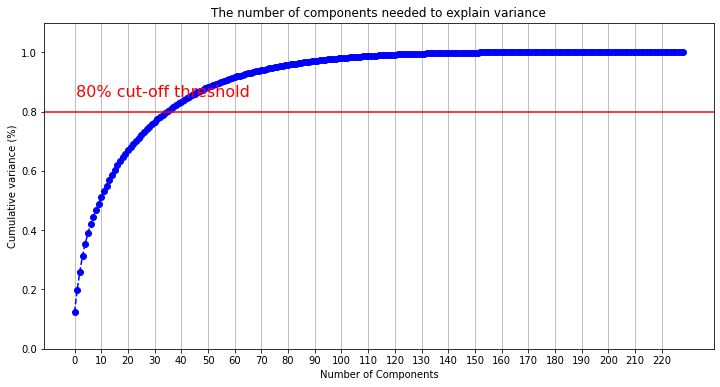

In [192]:
# PCA ANALYSIS

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA().fit(datasetA)
plt.rcParams["figure.figsize"] = (12,6)
fig, ax = plt.subplots()
xi = np.arange(0, 229, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 229, step=10)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.80, color='r', linestyle='-')
plt.text(0.5, 0.85, '80% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [193]:
a2=data2A.copy()
pca = PCA(n_components = 32)
pca.fit(data2A)
PCA_dataA = pca.transform(data2A)

In [194]:
from pyclustering.cluster import cluster_visualizer_multidim
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.kmedians import kmedians
def KMEDIAN(reduced,value_k): 
  np.random.shuffle(reduced)
  k_median1=kmedians(reduced,np.copy(np.unique(reduced, axis=0)[:value_k]))
  k_median1.process()
  clus_distance=k_median1.get_total_wce()
  return clus_distance

In [197]:
cluster_distances1=[]
idx=9
while(idx<24):
  y=PCA_dataA.copy()
  np.random.shuffle(y)
  k_median1=kmedians(y,np.copy(np.unique(y, axis=0)[:idx+1]))
  k_median1.process()
  clus_distance=k_median1.get_total_wce()
  cluster_distances1.append(clus_distance/(idx+1))
  print(idx+1,clus_distance/(idx+1))
  idx=idx+1

10 3840.561721914825
11 3343.884503455742
12 2874.9877779374856
13 2546.991111386026
14 2529.892327082505
15 2686.847915781711
16 2104.8624489308318
17 2031.0309795734836
18 1711.405723975964
19 1554.763595205172
20 1575.8041349436185
21 1722.9399564778537
22 1508.024250148708
23 1324.3417428943005
24 1311.5131007461061


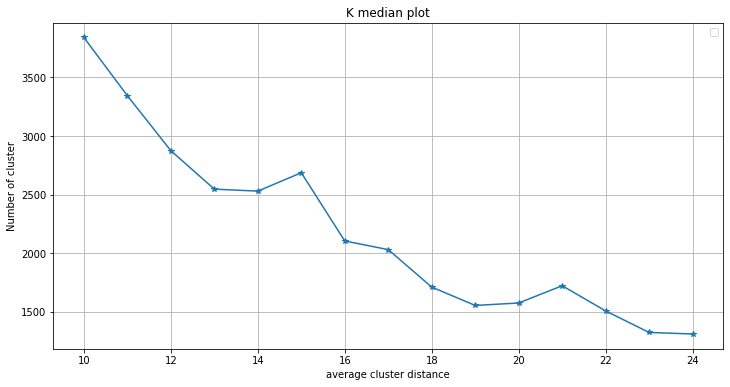

In [198]:
zx1=[]
for k in cluster_distances1:
    zx1.append(k)

plt.plot([10,11,12,13,14,15,16,17,18,19,20,21,22,23,24],zx1,marker='*')
plt.ylabel('Number of cluster')
plt.xlabel("average cluster distance")
plt.grid()
plt.legend()
plt.title("K median plot")
plt.show()

In [200]:
y=PCA_dataA.copy()
np.random.shuffle(y)
k_median1=kmedians(y,np.copy(np.unique(y, axis=0)[:22]))
k_median1.process()
clus_distance=k_median1.get_total_wce()
cluster1 = k_median1.get_clusters()
md1 = k_median1.get_medians()
print(22,clus_distance/22)

22 1508.024250148708


Thank You